In [1]:
import sys
sys.path.insert(1, "../python")

import functions as fct
import plotting_functions as pltfct

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
from datetime import datetime, timedelta
from scipy import integrate, optimize
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])

In [3]:
df = fct.read_df('../../04_output_data/superdf_new_nodes.csv')
df = fct.power_percentile_mean(df)

## plots are saved with this dpi configuration
## By default, the plt.savefig is disabled for the plots and has to be manually turned on
dpi = 500

<Figure size 800x600 with 0 Axes>

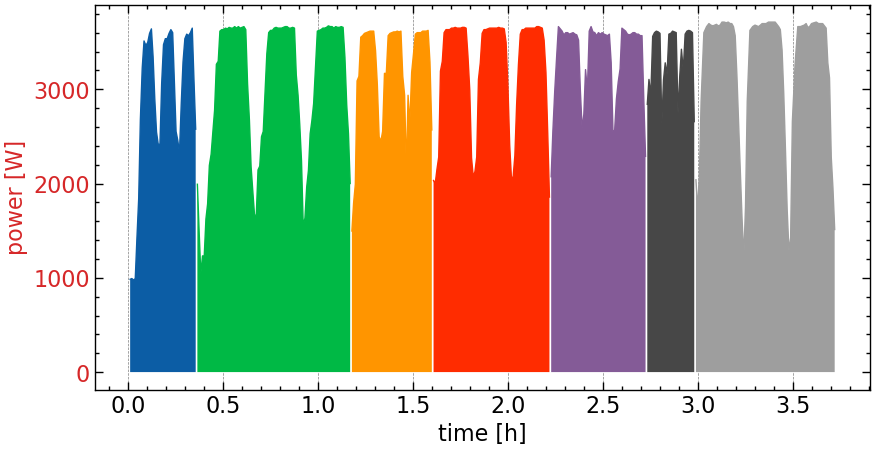

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

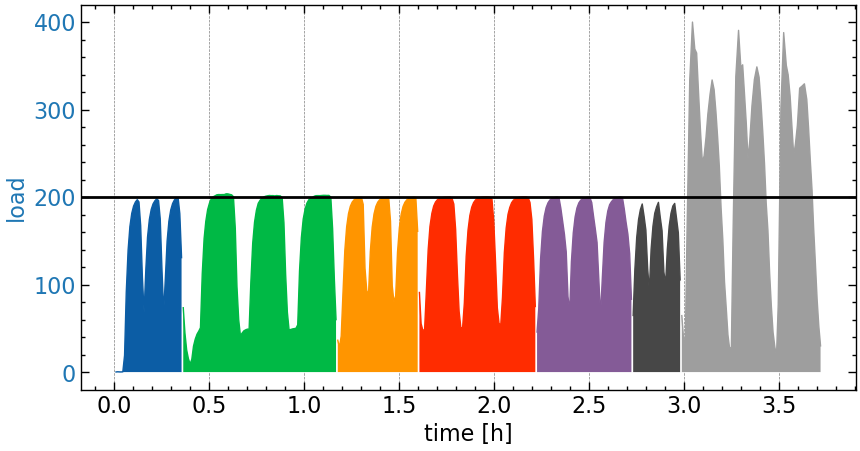

In [4]:
pltfct.plot_lifeline_separate('2610_0000', 'n2121', fontsize=15, ncol=4,
                              #savefig=['../../05_plots/power_time_nn.png', '../../05_plots/load_time_nn.png', '../../05_plots/x_time_legend_nn.png']
                              )

## Plots concerning the frequency variation of the nodes equipped with the AMD CPUs

/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['PS'] = temp_df['PS'].to_numpy() / 4
/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].to_numpy() / 4


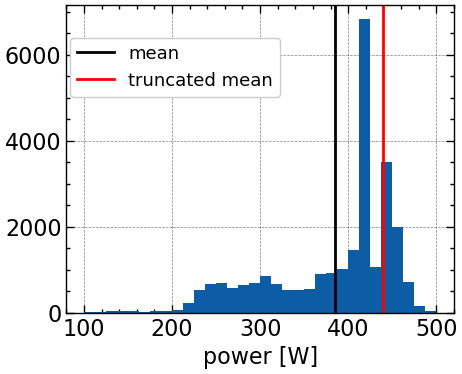

/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['PS'] = temp_df['PS'].to_numpy() / 4
/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].to_numpy() / 4


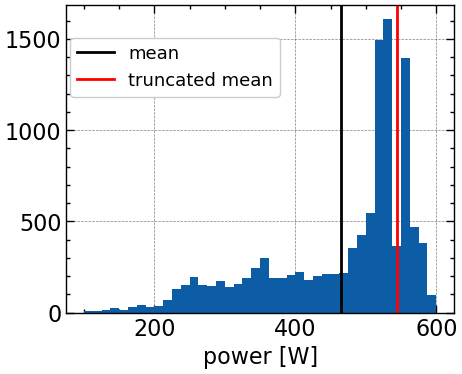

/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['PS'] = temp_df['PS'].to_numpy() / 4
/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].to_numpy() / 4


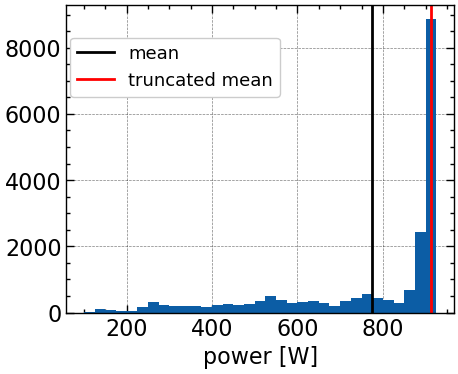

In [5]:
pltfct.plot_power_hist(['freq', 1500], df[df['ncores'] == 196], 
                       #savefig='../../05_plots/power_hist_nn_1500MHz.png', 
                       binwidth=12.5)
pltfct.plot_power_hist(['freq', 2000], df[df['ncores'] == 196], 
                       #savefig='../../05_plots/power_hist_nn_2000MHz.png', 
                       binwidth=12.5)
pltfct.plot_power_hist(['freq', 2700], df[df['ncores'] == 196], 
                       #savefig='../../05_plots/power_hist_nn_2700MHz.png', 
                       binwidth=25)

8.0 8.0


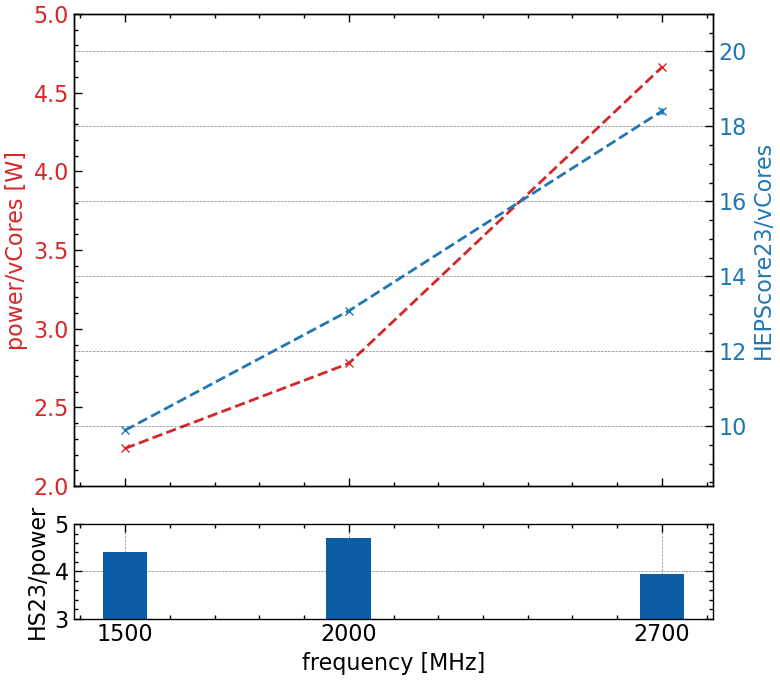

In [6]:
frequency, power, power_err, hs, hs_err, runtime, runtime_err = fct.data_to_numpy(df[(df['ncores'] == 196) & (df['power_policy'] == 'userspace')], mode='freq')

fig, (ax1, ax3) = plt.subplots(2, 1, sharex=True, height_ratios=np.array([5, 1]))

color = 'tab:red'
ax1.set_ylabel('power/vCores [W]', color=color)
ax1.errorbar(frequency, power, color=color, yerr=power_err, fmt='x--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('HEPScore23/vCores', color=color)
ax2.errorbar(frequency, hs, color=color, yerr=hs_err, fmt='x--')
ax2.tick_params(axis='y', labelcolor=color)

ax3.set_xlabel('frequency [MHz]')
ax3.bar(frequency, hs/power, width=np.zeros(len(frequency)) + 100)
ax3.set_yticks([3, 4, 5])
ax3.set_ylim(3, 5)
ax3.set_ylabel('HS23/power')

ax1.grid()
ax3.set_xticks([1500, 2000, 2700])

lim = np.array([2, 5])

ax1.set_ylim(lim)
ax2.set_ylim(lim*4.2)

print(fig.get_figwidth(), fig.get_figwidth())
fig.set_figheight(7)
fig.set_figwidth(8)
fig.tight_layout()

plt.show()
#plt.savefig('../../05_plots/power_hs_nn_freq.png', dpi=dpi, transparent=True)

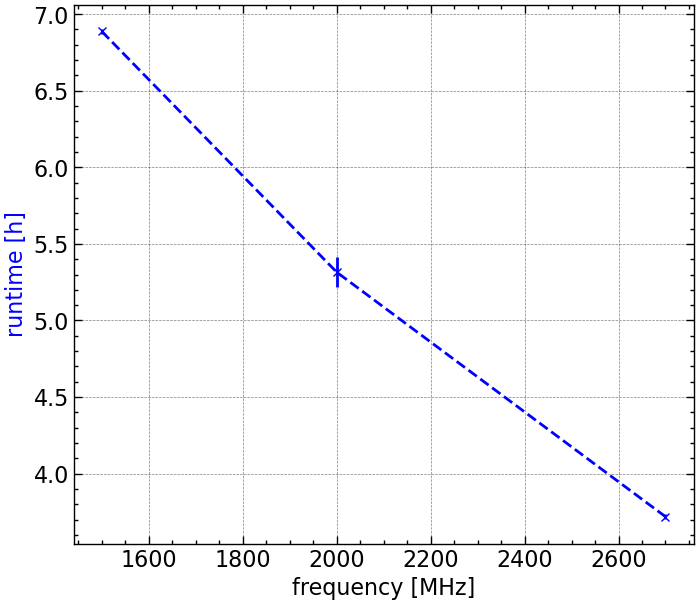

In [7]:
fig, ax = plt.subplots(1,1)

fig.set_figwidth(8)
fig.set_figheight(7)

ax.errorbar(frequency, runtime, fmt='bx--', yerr=runtime_err)

ax.set_xlabel('frequency [MHz]')
ax.set_ylabel('runtime [h]', color='b')

fig.set_figwidth(8)
fig.set_figheight(7)

plt.show()
#plt.savefig('../../05_plots/runtimes_nn_freq.png', dpi=dpi, transparent=True)

In [8]:
## saves data in latex table
pd.DataFrame({'frequency [MHz]' : frequency, 'power/vcore [W]' : power, 'HS23/vcore' : hs, 'runtime [h]' : runtime}).to_latex(#'../../05_plots/data_196c_nn.tex',
            float_format="{:.1f}".format,
            index=False,
            column_format='|c|c|c|c|')

'\\begin{tabular}{|c|c|c|c|}\n\\toprule\nfrequency [MHz] & power/vcore [W] & HS23/vcore & runtime [h] \\\\\n\\midrule\n1500.0 & 2.2 & 9.9 & 6.9 \\\\\n2000.0 & 2.8 & 13.1 & 5.3 \\\\\n2700.0 & 4.7 & 18.4 & 3.7 \\\\\n\\bottomrule\n\\end{tabular}\n'

## Plots concerning the vCore variation of the nodes equipped with the AMD CPUs

/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['PS'] = temp_df['PS'].to_numpy() / 4
/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].to_numpy() / 4


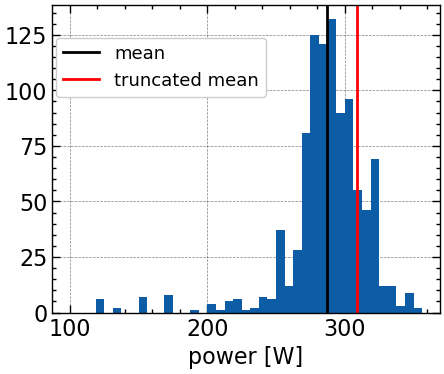

/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['PS'] = temp_df['PS'].to_numpy() / 4
/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].to_numpy() / 4


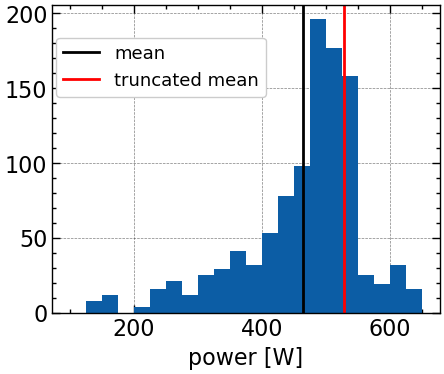

/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['PS'] = temp_df['PS'].to_numpy() / 4
/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].to_numpy() / 4


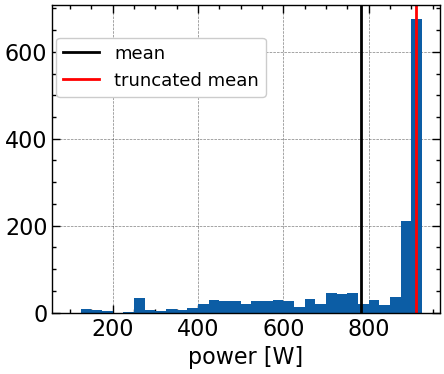

/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['PS'] = temp_df['PS'].to_numpy() / 4
/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].to_numpy() / 4


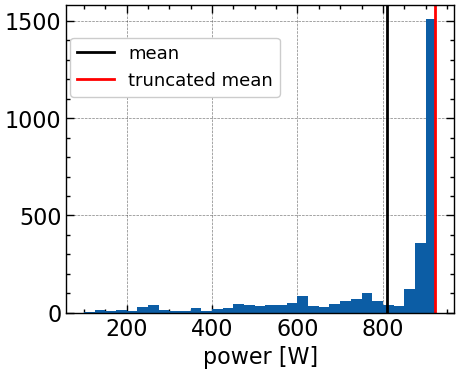

In [9]:
pltfct.plot_power_hist(['ncores', 8], df, 
                       #savefig='../../05_plots/power_hist_nn_8_ncores.png'
                       )
pltfct.plot_power_hist(['ncores', 48], df, 
                       #savefig='../../05_plots/power_hist_nn_96_ncores.png', 
                       binwidth=25)
pltfct.plot_power_hist(['ncores', 192], df, 
                       #savefig='../../05_plots/power_hist_nn_192_ncores.png', 
                       binwidth=25)
pltfct.plot_power_hist(['ncores', 256], df, 
                       #savefig='../../05_plots/power_hist_nn_256_ncores.png', 
                       binwidth=25)

8.0 8.0


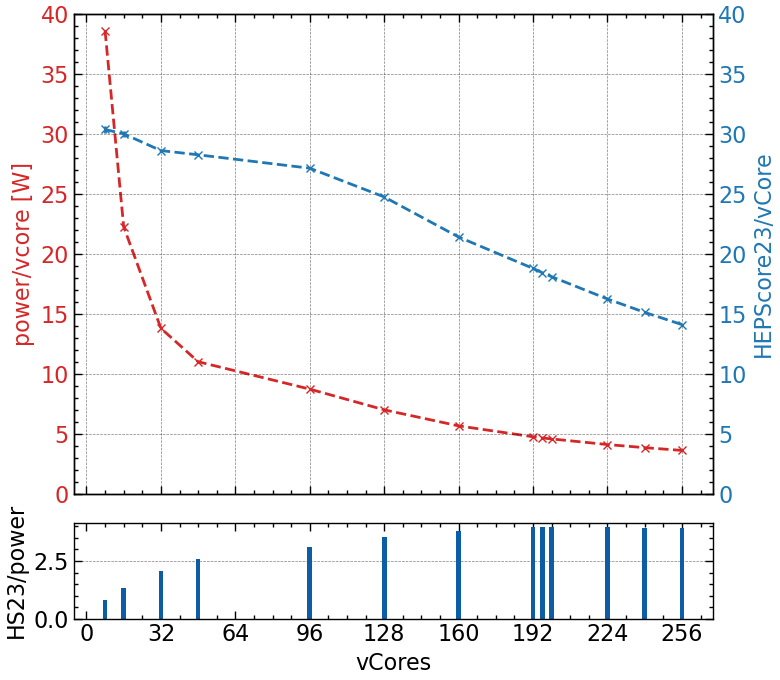

In [10]:
ncores, power, power_err, hs, hs_err, runtime, runtime_err = fct.data_to_numpy(df[(df['power_policy'] == 'performance') & (df['run'] != '2710_0000')], mode='ncores')


fig, (ax1, ax3) = plt.subplots(2, 1, sharex=True, height_ratios=np.array([5, 1]))

color = 'tab:red'
ax1.set_ylabel('power/vcore [W]', color=color)
ax1.errorbar(ncores, power, color=color, yerr=power_err, fmt='x--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('HEPScore23/vCore', color=color)
ax2.errorbar(ncores, hs, color=color, yerr=hs_err, fmt='x--')
ax2.tick_params(axis='y', labelcolor=color)

ax3.set_xlabel('vCores')
ax3.bar(ncores, hs/power, width=np.zeros(len(ncores)) + 2)
ax3.set_xticks([8, 16, 24, 32, 40])
ax3.set_ylabel('HS23/power')

ax1.grid(axis='y')
ax3.grid(axis='x')
ax3.set_xticks(np.arange(0, 257, 32))

ax1.set_ylim(0, 40)
ax2.set_ylim(0, 40)


print(fig.get_figwidth(), fig.get_figwidth())
fig.set_figheight(7)
fig.set_figwidth(8)
fig.tight_layout()

plt.show()
#plt.savefig('../../05_plots/power_hs_per_vcore_nn_ncores.png', dpi=dpi, transparent=True)

(3.5, 4.2)
8.0 8.0


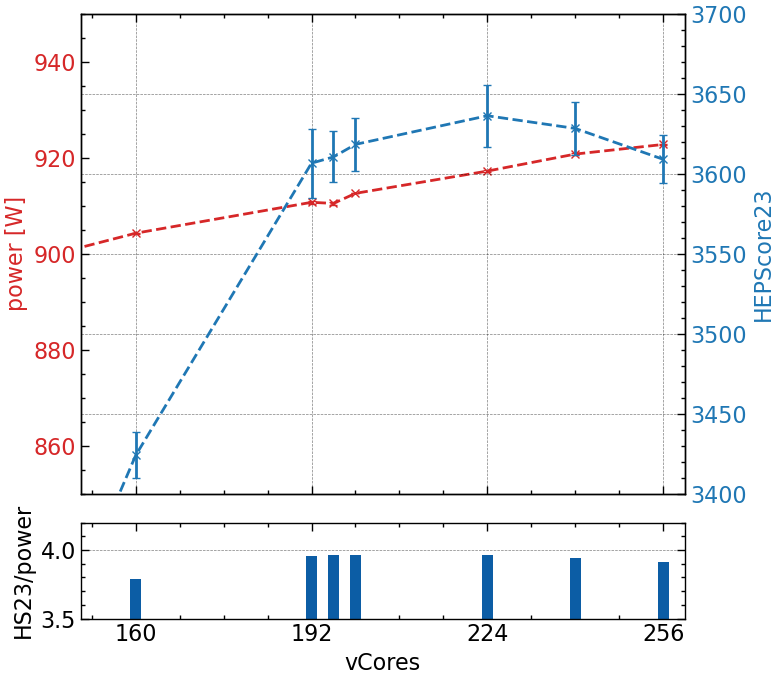

In [11]:
ncores, power, power_err, hs, hs_err, runtime, runtime_err = fct.data_to_numpy(df[(df['power_policy'] == 'performance') & (df['run'] != '2710_0000')], mode='ncores', per_vcore=False)


fig, (ax1, ax3) = plt.subplots(2, 1, sharex=True, height_ratios=np.array([5, 1]))

color = 'tab:red'
ax1.set_ylabel('power [W]', color=color)
ax1.errorbar(ncores, power, color=color, yerr=power_err, fmt='x--', capsize=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('HEPScore23', color=color)
ax2.errorbar(ncores, hs, color=color, yerr=hs_err, fmt='x--', capsize=3)
ax2.tick_params(axis='y', labelcolor=color)

ax3.set_xlabel('vCores')
ax3.bar(ncores, hs/power, width=np.zeros(len(ncores)) + 2)
ax3.set_xticks([8, 16, 24, 32, 40])
ax3.set_ylabel('HS23/power')

ax1.grid(axis='y')
ax3.grid(axis='x')
ax3.set_xticks(np.arange(0, 257, 32))

ax1.set_xlim(150, 260)
ax1.set_ylim(850, 950)
ax2.set_ylim(3400, 3700)
ax3.set_ylim(3.5, 4.2)
print(ax3.get_ylim())

print(fig.get_figwidth(), fig.get_figwidth())
fig.set_figheight(7)
fig.set_figwidth(8)
fig.tight_layout()

plt.show()
#plt.savefig('../../05_plots/power_hs_nn_ncores_clipped.png', dpi=dpi, transparent=True)

8.0 8.0


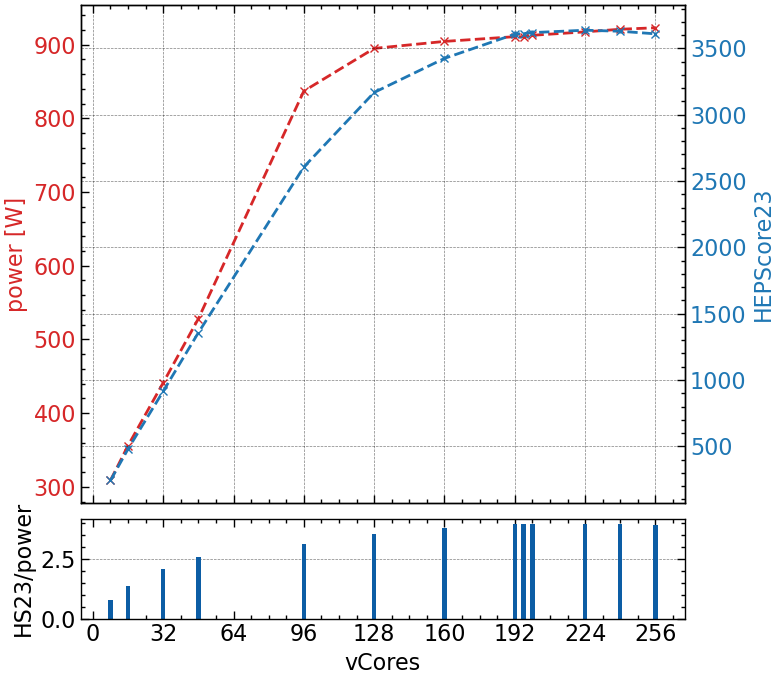

In [12]:
fig, (ax1, ax3) = plt.subplots(2, 1, sharex=True, height_ratios=np.array([5, 1]))

color = 'tab:red'
ax1.set_ylabel('power [W]', color=color)
ax1.errorbar(ncores, power, color=color, yerr=power_err, fmt='x--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('HEPScore23', color=color)
ax2.errorbar(ncores, hs, color=color, yerr=hs_err, fmt='x--')
ax2.tick_params(axis='y', labelcolor=color)

ax3.set_xlabel('vCores')
ax3.bar(ncores, hs/power, width=np.zeros(len(ncores)) + 2)
ax3.set_xticks([8, 16, 24, 32, 40])
ax3.set_ylabel('HS23/power')

ax1.grid(axis='y')
ax3.grid(axis='x')
ax3.set_xticks(np.arange(0, 257, 32))

print(fig.get_figwidth(), fig.get_figwidth())
fig.set_figheight(7)
fig.set_figwidth(8)
fig.tight_layout()

plt.show()
#plt.savefig('../../05_plots/power_hs_nn_ncores.png', dpi=dpi, transparent=True)

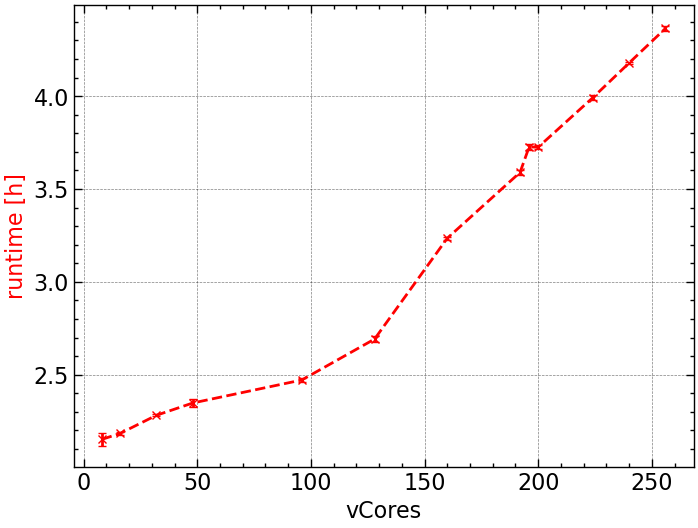

In [13]:
plt.errorbar(ncores, runtime, yerr=runtime_err, fmt='rx--', capsize=3)
plt.xlabel('vCores')
plt.ylabel('runtime [h]', color='r')

plt.show()
#plt.savefig('../../05_plots/runtimes_nn_ncores.png', dpi=dpi, transparent=True)

In [14]:
## saves data in latex table
ncores, power, power_err, hs, hs_err, runtime, runtime_err = fct.data_to_numpy(df[(df['power_policy'] == 'performance') & (df['run'] != '2710_0000')], mode='ncores')
pd.DataFrame({'vCores' : ncores, 'power/vCore [W]' : power, 'HS23/vCore' : hs, 'power [W]' : power * ncores, 'HS23' : hs * ncores, 'runtime [h]' : runtime,
              'frequency' : df[df['power_policy'] == 'performance'].groupby('ncores')['freq'].mean().to_numpy()}
             ).to_latex(#'../../05_plots/data_ncores_nn.tex',
            float_format="{:.1f}".format,
            index=False,
            column_format='|c|c|c|c|c|c|c|')

'\\begin{tabular}{|c|c|c|c|c|c|c|}\n\\toprule\nvCores & power/vCore [W] & HS23/vCore & power [W] & HS23 & runtime [h] & frequency \\\\\n\\midrule\n8.0 & 38.6 & 30.4 & 308.8 & 242.9 & 2.2 & 2500.0 \\\\\n16.0 & 22.3 & 30.0 & 356.1 & 480.1 & 2.2 & 2500.0 \\\\\n32.0 & 13.8 & 28.6 & 441.3 & 915.5 & 2.3 & 2500.0 \\\\\n48.0 & 11.0 & 28.3 & 528.1 & 1356.4 & 2.3 & 2600.0 \\\\\n96.0 & 8.7 & 27.1 & 836.9 & 2605.4 & 2.5 & 2700.0 \\\\\n128.0 & 7.0 & 24.7 & 894.8 & 3167.3 & 2.7 & 2700.0 \\\\\n160.0 & 5.7 & 21.4 & 904.3 & 3424.0 & 3.2 & 2700.0 \\\\\n192.0 & 4.7 & 18.8 & 910.7 & 3606.7 & 3.6 & 2700.0 \\\\\n196.0 & 4.6 & 18.4 & 910.5 & 3610.6 & 3.7 & 2700.0 \\\\\n200.0 & 4.6 & 18.1 & 912.6 & 3618.4 & 3.7 & 2700.0 \\\\\n224.0 & 4.1 & 16.2 & 917.2 & 3636.4 & 4.0 & 2700.0 \\\\\n240.0 & 3.8 & 15.1 & 920.8 & 3628.4 & 4.2 & 2700.0 \\\\\n256.0 & 3.6 & 14.1 & 922.8 & 3609.1 & 4.4 & 2700.0 \\\\\n\\bottomrule\n\\end{tabular}\n'